In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read file 
dfx = pd.read_csv('csv_files/p2no_skew.csv', index_col=0)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C3p,C5p,C2,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,2.275984,0,1.351792,1.0,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,2.487662,1,2.487306,0.0,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,1.978602,1,1.214656,1.0,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,2.188931,1,1.193831,1.0,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,2.346674,0,1.315407,1.0,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143


In [3]:
dfbinary = dfx.filter(['C2', 'C3p'])
dfbinary.head()

,C2,C3p
0,1.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,0


In [4]:
dfx = dfx.drop(labels=['C2', 'C3p'],axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S1,S2,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,3.957892,2.211554,2.275984,1.351792,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,4.140818,2.496333,2.487662,2.487306,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,3.936497,1.790959,1.978602,1.214656,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,4.308869,1.973068,2.188931,1.193831,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,4.061548,2.302490,2.346674,1.315407,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143


**One Column**

In [5]:
my_col = dfx['C1']
my_col.head()

0    2.227033
1    2.524740
2    2.116933
3    2.436077
4    2.075782
Name: C1, dtype: float64

In [6]:
# define upper boundary
u_bound = my_col.mean() + 3* my_col.std()
print(u_bound)

2.975333116663967


In [7]:
# which records are above the upper boundary
my_col[my_col>u_bound]

65     3.574816
141    3.067427
228    3.089133
391    3.316625
413    3.004782
628    3.063733
665    3.289497
Name: C1, dtype: float64

In [8]:
# replace outliers with upper boundary
my_col[my_col>u_bound] = u_bound

In [9]:
# check
pd.Series(my_col>u_bound).value_counts()

False    682
Name: C1, dtype: int64

In [10]:
# another check
my_col[my_col>u_bound]

Series([], Name: C1, dtype: float64)

In [11]:
# define lower boundary 
l_bound = my_col.mean() - 3* my_col.std()
print(l_bound)

1.5019178597752965


In [12]:
# which records are under the lower boundary
my_col[my_col<l_bound]

148    1.491301
575    1.467799
589    1.467799
Name: C1, dtype: float64

In [13]:
# replace outliers with lower boundary
my_col[my_col<l_bound] = l_bound

In [14]:
# check
pd.Series(my_col<l_bound).value_counts()

False    682
Name: C1, dtype: int64

In [15]:
# another check
my_col[my_col<l_bound]

Series([], Name: C1, dtype: float64)

**All Columns Upper**

In [16]:
for col in dfx.columns:
    u_bound = dfx[col].mean() + 3* dfx[col].std()
    dfx[col][dfx[col] > u_bound] = u_bound

In [17]:
# check
pd.Series(dfx[col][dfx[col]] > u_bound).value_counts()

False    682
Name: UncertainWords, dtype: int64

**All Columns Lower**

In [18]:
for col in dfx.columns:
    l_bound = dfx[col].mean() - 3* dfx[col].std()
    dfx[col][dfx[col] < l_bound] = l_bound

In [19]:
# check
pd.Series(dfx[col][dfx[col]] < l_bound).value_counts()

False    682
Name: UncertainWords, dtype: int64

**Verifying that outliers were removed**

whis = 'range' allows the whiskers of the plot to encompass all values up until the upper and lower bounds 

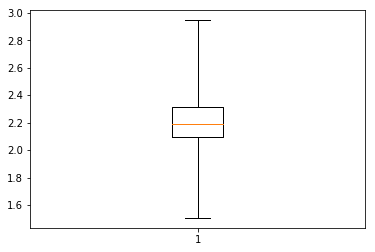

In [20]:
plt.boxplot(dfx['C1'], whis='range')
plt.show()

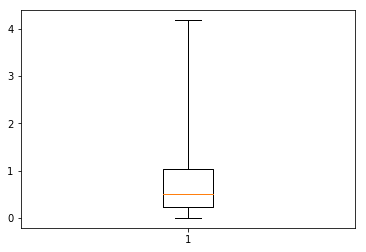

In [21]:
plt.boxplot(dfx['C3'], whis='range')
plt.show()

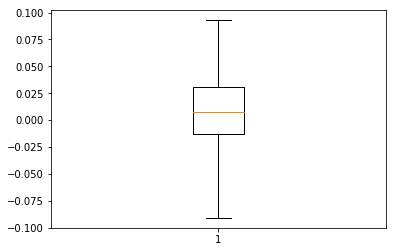

In [22]:
plt.boxplot(dfx['C4'], whis='range')
plt.show()

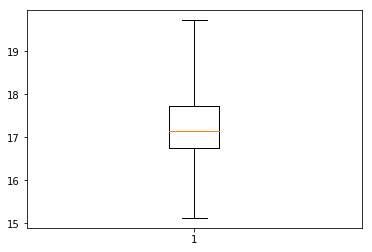

In [23]:
plt.boxplot(dfx['C5'], whis='range')
plt.show()

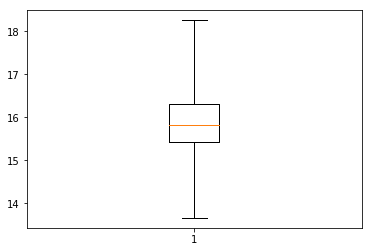

In [24]:
plt.boxplot(dfx['C6'], whis='range')
plt.show()

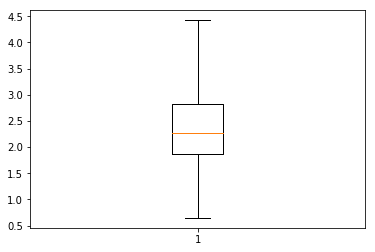

In [25]:
plt.boxplot(dfx['C7'], whis='range')
plt.show()

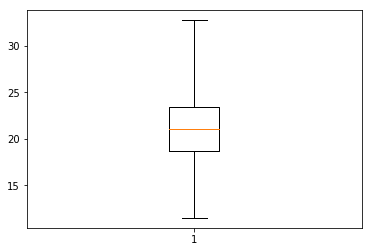

In [26]:
plt.boxplot(dfx['T1'], whis='range')
plt.show()

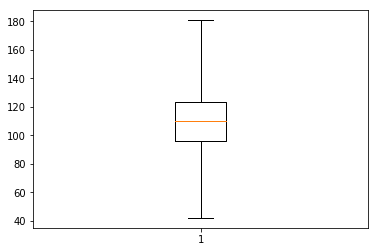

In [27]:
plt.boxplot(dfx['T2'], whis='range')
plt.show()

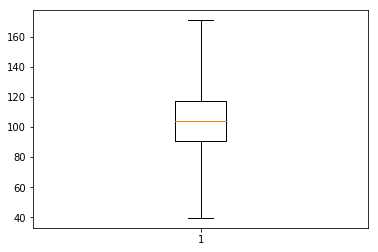

In [28]:
plt.boxplot(dfx['T3'], whis='range')
plt.show()

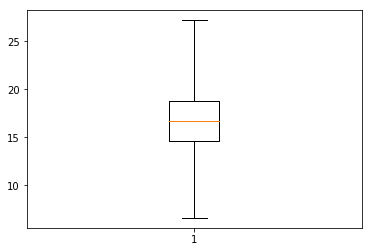

In [29]:
plt.boxplot(dfx['T4'], whis='range')
plt.show()

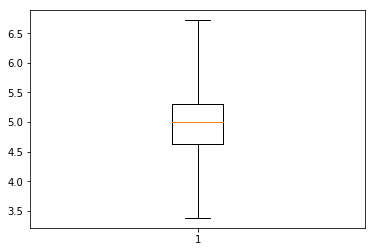

In [30]:
plt.boxplot(dfx['T5'], whis='range')
plt.show()

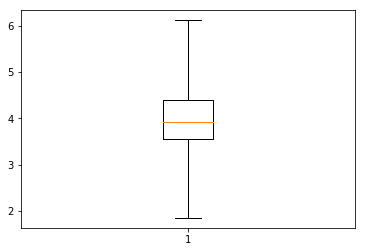

In [31]:
plt.boxplot(dfx['S1'], whis='range')
plt.show()

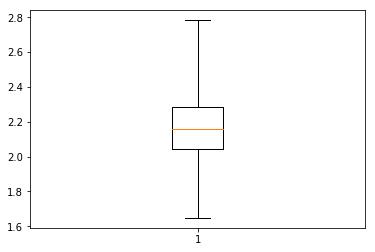

In [32]:
plt.boxplot(dfx['S2'], whis='range')
plt.show()

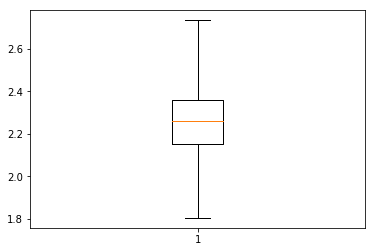

In [33]:
plt.boxplot(dfx['S3'], whis='range')
plt.show()

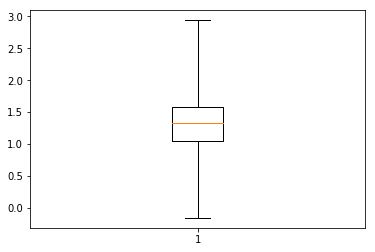

In [34]:
plt.boxplot(dfx['C5p'], whis='range')
plt.show()

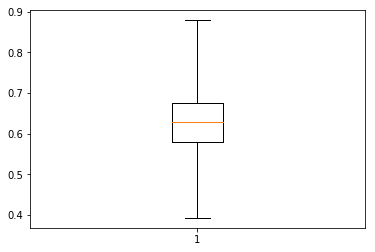

In [35]:
plt.boxplot(dfx['LongSentences'], whis='range')
plt.show()

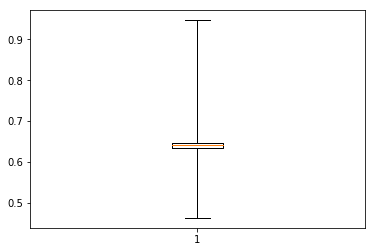

In [36]:
plt.boxplot(dfx['RealWords'], whis='range')
plt.show()

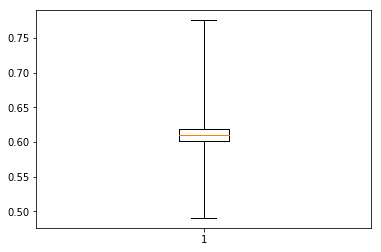

In [37]:
plt.boxplot(dfx['LongWords'], whis='range')
plt.show()

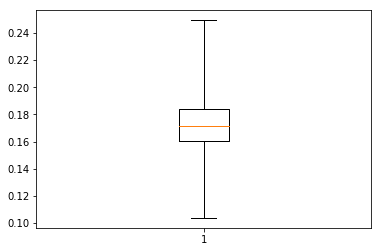

In [38]:
plt.boxplot(dfx['PositiveWords'], whis='range')
plt.show()

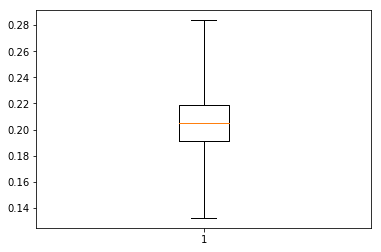

In [39]:
plt.boxplot(dfx['NegativeWords'], whis='range')
plt.show()

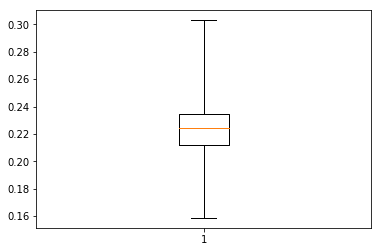

In [40]:
plt.boxplot(dfx['UncertainWords'], whis='range')
plt.show()

In [42]:
dfx = pd.concat([dfx, dfbinary], axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,2.275984,1.351792,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915,1.0,0
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,2.487662,2.487306,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556,0.0,1
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,1.978602,1.214656,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078,1.0,1
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,2.188931,1.193831,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040,1.0,1
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,2.346674,1.315407,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143,1.0,0


In [43]:
dfx.to_csv('csv_files/p2stdev.csv')